In [113]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.tree import export_graphviz
from IPython import display
from sklearn.ensemble import RandomForestRegressor

videos = pd.read_csv("FRvideos.csv")


In [123]:
# count days of trending
# trending_period = videos_clean.groupby(['video_id']).size().reset_index(name='trending_period')

videos_clean = videos.drop(columns=['video_id','thumbnail_link','video_error_or_removed','dislikes','likes','comment_count'])

# formating date
#videos_clean['publish_time'] = pd.to_datetime(videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.000Z', utc=False)
#videos_clean['trending_date'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m', utc=False)

# drop duplicate and keep newest videos
videos_clean = videos_clean.sort_values(by=['trending_date']).reset_index()
videos_clean

,index,trending_date,title,channel_title,category_id,publish_time,tags,views,comments_disabled,ratings_disabled,description
0,3398,17.01.12,Avengers : Infinity War - Première bande-annon...,Marvel FR,1,2017-11-29T13:26:16.000Z,"Marvel""|""avengers infinity war""|""avengers 4""|""...",527655,False,False,Tout a mené à cet instant. Découvrez la premiè...
1,3526,17.01.12,NBA EXTRA DÉBARQUE CHEZ FIRST TEAM ! NBA First...,FIRST TEAM,17,2017-11-30T16:56:25.000Z,"first team""|""basket ball""|""basket""|""nba""|""dunk...",22867,False,False,Xavier Vaution & Remi Reverchon sont les invit...
2,3527,17.01.12,Beni Affet 1266. Bölüm,Beni Affet,1,2017-11-30T14:17:03.000Z,"beni affet dizi""|""ceren yalazoğlu""|""beni affet...",135708,False,False,Beni Affet'e dair her şey startv.com.tr'de → h...
3,3528,17.01.12,Essai Dacia Duster 2018 : 3 qualités et 3 défauts,L'argus,2,2017-11-30T09:37:15.000Z,"dacia duster""|""suv""|""4x4""|""tout terrain""|""low ...",4669,False,False,Sous une carapace qui change peu et à un tarif...
4,3529,17.01.12,RDC -Départ de Kabila...En direct avec Ndeko E...,BOBO KOYANGBWA,25,2017-11-30T12:35:55.000Z,"MPBTV""|""BOBO""|""MICRO DU PASTEUR BOBO""|""TOKOMI ...",12817,False,False,RDC -Départ de Kabila...En direct avec Ndeko E...
...,...,...,...,...,...,...,...,...,...,...,...
40719,37901,18.31.05,Kids United Nouvelle Génération - La Tendresse...,We Are Kids United,10,2018-05-30T07:55:38.000Z,"kids united|""kids""|""united""|""kids united nouve...",225258,False,False,Kids United Nouvelle Génération - La Tendresse...
40720,37900,18.31.05,Education : nous n'avons pas les mêmes valeurs...,Ça commence aujourd'hui,24,2018-05-30T13:30:00.000Z,"famille|""ça commence aujourd'hui""|""faustine bo...",26353,False,False,Abonnez-vous pour ne rien rater des nouveaux é...
40721,37899,18.31.05,Khalass Rfm du 31 Mai 2018,MOUSSOU Assane DIOUF,22,2018-05-31T10:20:20.000Z,"khalass|""khalass rfm""|""khalass rfm du jour""|""K...",17001,False,False,🔔🔔🔔Moussou Assane Diouf🔔🔔🔔🚩🚩 Chaîne YouTube Sé...
40722,37873,18.31.05,Take A Mic - Strict Minimum 9 (Tracklist),Take A Mic,10,2018-05-31T16:06:15.000Z,[none],44926,False,False,Take A Mic - Strict Minimum 9 (Tracklisting)« ...


In [115]:
print(videos_clean.views.mean())

419921.8506040664


In [116]:
def convert(data):
    videos_clean['description']=str(videos_clean['description'])
    number = preprocessing.LabelEncoder()
    videos_clean['title'] = number.fit_transform(videos_clean.title)
    videos_clean['channel_title'] = number.fit_transform(videos_clean.channel_title)
    videos_clean['tags'] = number.fit_transform(videos_clean.tags)
    videos_clean['publish_time'] = number.fit_transform(videos_clean.publish_time)
    videos_clean['description'] = number.fit_transform(videos_clean.description)
    data=data.fillna(-999)
    return data

In [124]:
y=videos_clean['views']
X=convert(videos_clean)
X=X.drop(['index','views','trending_date'], axis = 1)


X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=2)

# Le Random Forest Regressor



In [125]:


rf = RandomForestRegressor(n_estimators=100, max_depth=200,random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_test = MSE( y_pred_rf, y_test)**(1/2)

r2_score_rf = r2_score(y_test, y_pred_rf)
        
        
print('RMSE on test set using rf : {:.4f}'.format(rmse_test))
print('R² score on test set using rf : {:.4f}'.format(r2_score_rf))


RMSE on test set using rf : 1183650.2402
R² score on test set using rf : 0.6806


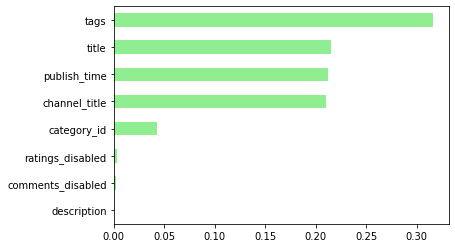

In [126]:
importances = pd.Series(index=X.columns, data=rf.feature_importances_)

importances_sorted = importances.sort_values()

importances_sorted.plot(kind = 'barh', color='lightgreen')

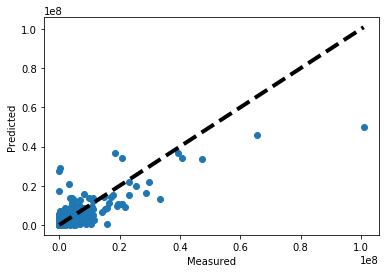

In [127]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Le KneighborsRegressor


In [133]:

knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)
rmse_test_knr = MSE(y_test, y_pred_knr)**(1/2)

r2_score_knr = r2_score(y_test, y_pred_knr)


print('RMSE on test set using knr : {:.4f}'.format(rmse_test_knr))
print('R² score on test set using knr : {:.4f}'.format(r2_score_rf))
    

RMSE on test set using knr : 1331227.5234
R² score on test set using knr : 0.6806


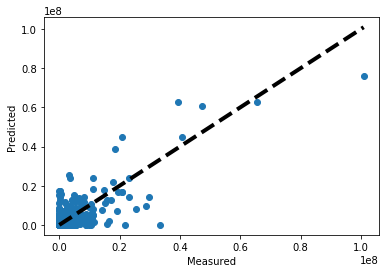

In [134]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_knr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# La Linear Regression

In [131]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
rmse_test_reg = MSE(y_test, y_pred_reg)**(1/2)
r2_score_reg = r2_score(y_test, y_pred_reg)

print('RMSE on test set using reg : {:.4f}'.format(rmse_test_reg))
print('R² score on test set using reg : {:.4f}'.format(r2_score_reg))




RMSE on test set using reg : 2087925.9027
R² score on test set using reg : 0.0062


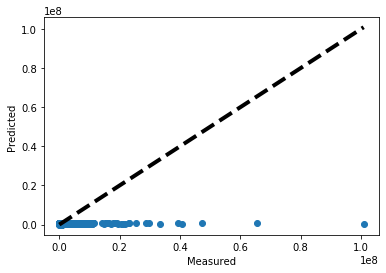

In [132]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_reg)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()